# Morfología en imágenes a escala de grises
Muchas operaciones morfológicas se desarrollaron originalmente para imágenes binarias. A continuación se verá una extensión de estas operaciones para imágenes a escala de grises.

¿Qué se necesitará?
- Imagen $A$: toma valores $\{0,1,\ldots,255\}$.
- Elemento estructurado $B$: toma valores $\{0,1,\ldots,255\}$.

## Dilatación
La dilatación de A usando un elemento estructurado B se define como

\begin{equation}
[A \oplus B]_{(i,j)} = max\{A(i+s,j+t)+B(s,t)/(s,t) \in D_b\}
\end{equation}

donde $D_{b}$ es el dominio del elemento estructurado.

![title](media/dilatacion-escala-grises.svg)

Es muy común utilizar como elemento estructurado una matriz nula, en este caso, se dice que $B$ es una matriz plana

\begin{equation}
[A \oplus B]_{(i,j)} = max\{A(i+s,j+t)/(s,t) \in D_b\}
\end{equation}

![title](media/dilatacion-escala-grises-ES-plano.svg)

In [1]:
function Y = dilatacion(A,r)
  % Funcion que implementa la operacion morfologica de
  % dilatacion en una imagen en escala de grises
  % A: imagen original en formato im2double
  % r: double con el radio de la ventana sin contar el centro
  % Y: imagen dilatada en formato im2double
  [m,n] = size(A);
  Y = uint8(zeros(m,n));
  
  for i = 1:m
    for j = 1:n
      % Calculo de los limites de la ventana actual
      sup = i - r; % Limite superior
      inf = i + r;  % Limite inferior
      izq = j - r; % Limite izquierdo
      der = j + r; % Limite derecho      
      
      % Comprobacion que los limites no sobrepasen 
      % las dimensiones de la imagen original
      if(sup < 1) sup = 1; endif
      if(inf > m) inf = m; endif
      if(izq < 1) izq = 1; endif
      if(der > n) der = n; endif

      % Calculo del maximo
      v = A(sup:inf, izq:der)(:);
      Y(i,j) = max(v);
    endfor  
  endfor  
endfunction

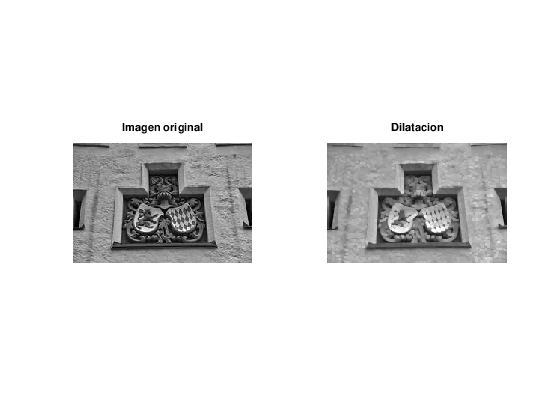

In [2]:
% Ejemplo de dilatacion en una imagen a escala de grises
clc; clear; close all;
pkg load image;
A = imread('media/imagen10.jpg');
subplot(1,2,1);
imshow(A);
title('Imagen original');

% Se utilizara un elemento estructurado de dimensiones 3x3
r = 1; % r = 1 -> ventana 3x3
C = dilatacion(A,r);
subplot(1,2,2);
imshow(C);
title('Dilatacion')

## Erosión
La erosión de una imagen $A$ usando un elemento estructurado plano $B$ se define como

\begin{equation}
[A \ominus B]_{(i,j)} = min\{A(i+s,j+t)/(s,t) \in D_b\}
\end{equation}

In [3]:
function Y = erosion(A,r)
  % Funcion que implementa la operacion morfologica de
  % erosion para una imagen en escala de grises
  % A: imagen original en formato im2double
  % r: double con el radio de la ventana sin contar el centro
  % Y: imagen erosionada en formato im2double
  [m,n] = size(A);
  Y = uint8(zeros(m,n));
  
  for i = 1:m
    for j = 1:n
      % Calculo de los limites de la ventana actual
      sup = i - r; % Limite superior
      inf = i + r;  % Limite inferior
      izq = j - r; % Limite izquierdo
      der = j + r; % Limite derecho      
      
      % Comprobacion que los limites no sobrepasen 
      % las dimensiones de la imagen original
      if(sup < 1) sup = 1; endif
      if(inf > m) inf = m; endif
      if(izq < 1) izq = 1; endif
      if(der > n) der = n; endif

      % Calculo del maximo
      v = A(sup:inf, izq:der)(:);
      Y(i,j) = min(v);
    endfor  
  endfor  
endfunction

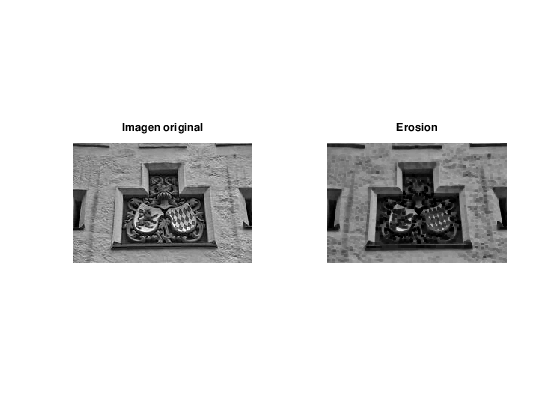

In [4]:
% Ejemplo de erosion en una imagen a escala de grises
clc; clear; close all;
pkg load image;
A = imread('media/imagen10.jpg');
subplot(1,2,1);
imshow(A);
title('Imagen original');

% Se utilizara un elemento estructurado de dimensiones 3x3
r = 1; % r = 1 -> ventana 3x3
C = erosion(A,r);
subplot(1,2,2);
imshow(C);
title('Erosion')

Las operaciones de apertura y clausura se definen de forma similar:
- Apertura: $f \circ b = (f \ominus b) \oplus b$
- Clausura: $f \bullet b = (f \oplus b) \ominus b$

Para mejorar el contraste de una imagen a escala de grises, se puede utilizar las transformadas de tipo "sombrero" (hat).
- Top-hat: $f - (f \circ b)$
- Bottom-hat: $(f \bullet b) - f$

**Nota.** En este caso la operación resta representa la resta de 2 matrices.

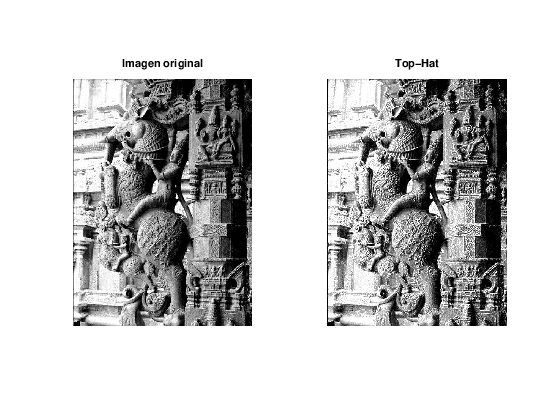

In [5]:
% Ejemplo de operacion Top-Hat
clc; clear; close all;
pkg load image;
A = imread('media/imagen11.jpg');
subplot(1,2,1);
imshow(A);
title('Imagen original');

% Se utilizara un elemento estructurado de dimensiones 3x3
r = 1; % r = 1 -> ventana 3x3

% Paso 1: Erosion C = A -o- B
C = erosion(A,r);

% Paso 2: Dilatacion D = C ? B
D = dilatacion(C,r);

% Paso 3: Resta E = A - D
E = A - D;

subplot(1,2,2);
imshow(A+E);
title('Top-Hat')

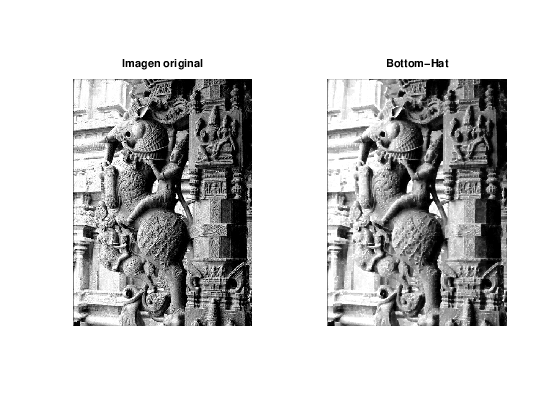

In [6]:
% Ejemplo de operacion Bottom-Hat
clc; clear; close all;
pkg load image;
A = imread('media/imagen11.jpg');
subplot(1,2,1);
imshow(A);
title('Imagen original');

% Se utilizara un elemento estructurado de dimensiones 3x3
r = 1; % r = 1 -> ventana 3x3

% Paso 1: Dilatacion
C = dilatacion(A,r);

% Paso 2: Erosion
D = erosion(C,r);

% Paso 3: Resta E = D - A
E = D - A;

subplot(1,2,2);
imshow(A+E);
title('Bottom-Hat')